In [2]:
# В данной работе будет сделан классический "hello world" в мире нейронных сетей.
# Классификация рукописных цифр из набора mnist
# Точность модели ~ 90 %


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
# Зугрузка датасета

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Приводим данные к значениям от 0 - 1

x_train, x_test = x_train/255.0, x_test / 255.0 # Пробнуть без x_test

In [6]:
# Создаем сеть

i = Input(shape=(x_train[0].shape))
x = SimpleRNN(50, activation = 'relu')(i)
x = Dense(10, activation = 'softmax')(x)

In [7]:
model = Model(i,x)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [8]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 32s 526us/sample - loss: 0.6571 - accuracy: 0.7850 - val_loss: 0.4267 - val_accuracy: 0.8617
Epoch 2/5
60000/60000 [==============================] - 49s 824us/sample - loss: 0.3099 - accuracy: 0.9086 - val_loss: 0.3012 - val_accuracy: 0.9118
Epoch 3/5
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.2533 - accuracy: 0.9263 - val_loss: 0.2026 - val_accuracy: 0.9415
Epoch 4/5
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.2193 - accuracy: 0.9359 - val_loss: 0.1959 - val_accuracy: 0.9431
Epoch 5/5
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.1979 - accuracy: 0.9417 - val_loss: 0.1630 - val_accuracy: 0.9522


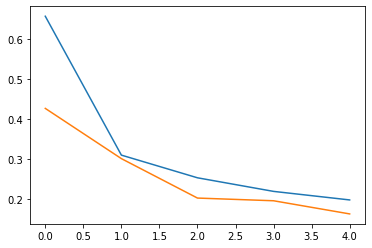

In [9]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

In [10]:
# Предсказываем метки наших тестовых данных, так же смотрим какое кол-во меток наша модель предсказала правильно, а
# какое не правильно, так же выведем кол-во правильно и непрвильно квалифицированных меток 

targets_class = np.unique(y_test)
preds = model.predict(x_test)
pred_list = []
count_valid = 0
count_non_valid = 0
for num, (i, j) in enumerate(zip(preds, y_test)):
    if np.argmax(i) == j:
        count_valid += 1
        pred_list.append(True)
    else:
        pred_list.append(False)
        count_non_valid +=1
    #print('Predict = {}, goal = {}'.format(np.argmax(i), j))
print(f'Valid = {count_valid}, non_valid = {count_non_valid}, mean = {sum(pred_list) / len(pred_list)} %')

Valid = 9522, non_valid = 478, mean = 0.9522 %
